# Notebook for finding distribution of HAIL_MAX2D values

### Import necessary libraries- might need stats libraries later

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.mlab as mlab
import statistics
import matplotlib.patheffects as pe

## Import WRF subregional files (switch between regions)

In [2]:
hist = xr.open_dataset('/home/scratch/jgoodin/US_subregions/hist_lower_plains_daily_max.nc') #Open hist daily max .nc file saved to /home/scratch directory
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/US_subregions/mid4p5_lower_plains_daily_max.nc') #Open mid-FUTR 4.5 daily max .nc file saved to /home/scratch directory
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/US_subregions/mid8p5_lower_plains_daily_max.nc') #Open mid-FUTR 8.5 daily max .nc file saved to /home/scratch directory
end4p5 = xr.open_dataset('/home/scratch/jgoodin/US_subregions/end4p5_lower_plains_daily_max.nc') #Open end-FUTR 4.5 daily max .nc file saved to /home/scratch directory
end8p5 = xr.open_dataset('/home/scratch/jgoodin/US_subregions/end8p5_lower_plains_daily_max.nc') #Open end-FUTR 8.5 daily max .nc file saved to /home/scratch directory

In [5]:
end8p5 #Test print one dataset- make sure daily data are returned and lats/lons are correct

<xarray.Dataset>
Dimensions:     (Time: 5478, south_north: 232, west_east: 250)
Coordinates:
  * Time        (Time) datetime64[ns] 2085-09-30T12:00:00 ... 2100-09-29T12:0...
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0

## Convert to units of inches

In [6]:
hist = hist.HAIL_MAX2D * 39.3701
mid4p5 = mid4p5.HAIL_MAX2D * 39.3701
mid8p5 = mid8p5.HAIL_MAX2D * 39.3701 #Convert to in
end4p5 = end4p5.HAIL_MAX2D * 39.3701
end8p5 = end8p5.HAIL_MAX2D * 39.3701

In [7]:
hist.max() #Ensure units are in inches

<xarray.DataArray 'HAIL_MAX2D' ()>
array(2.26341438)

## Convert HAIL_MAX2D data from each climate epoch to a 1D array (change variables to match climate epoch)

In [8]:
hist_1d = hist.values.ravel()
mid4p5_1d = mid4p5.values.ravel()
mid8p5_1d = mid8p5.values.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array
end4p5_1d = end4p5.values.ravel()
end8p5_1d = end8p5.values.ravel()

In [9]:
len(hist_1d) #Check length of 1D array for one climate epoch

317782000

## Remove all values from arrays ≠ 0

In [10]:
hist_nonzero = hist_1d[hist_1d != 0]
mid4p5_nonzero = mid4p5_1d[mid4p5_1d != 0]
mid8p5_nonzero = mid8p5_1d[mid8p5_1d != 0] #Select all values from climate epoch that are ≠ 0
end4p5_nonzero = end4p5_1d[end4p5_1d != 0] # **These are plotting variables**
end8p5_nonzero = end8p5_1d[end8p5_1d != 0]

In [11]:
len(hist_nonzero)

84046743

In [12]:
hist_nonzero.max() #If max/min are nan, run isfinite in cell below

nan

In [13]:
hist_nan = hist_nonzero[np.isfinite(hist_nonzero)]
mid4p5_nan = mid4p5_nonzero[np.isfinite(mid4p5_nonzero)]
mid8p5_nan = mid8p5_nonzero[np.isfinite(mid8p5_nonzero)] #Use numpy function isfinite to remove nan values
end4p5_nan = end4p5_nonzero[np.isfinite(end4p5_nonzero)]
end8p5_nan = end8p5_nonzero[np.isfinite(end8p5_nonzero)]

In [14]:
len(hist_nan) #Length should be less than previously

83930743

## Use scipy.stats library to create histogram output for each climate epoch. Returns # of bins specified by user and grid counts per bin

#### NOTE: bins sizes should all be the same

In [15]:
hist_count, hist_bins = scipy.histogram(hist_nan, 20)
mid4p5_count, mid4p5_bins = scipy.histogram(mid4p5_nan, 20)
mid8p5_count, mid8p5_bins = scipy.histogram(mid8p5_nan, 20) #Pass same # of bins to each epoch
end4p5_count, end4p5_bins = scipy.histogram(end4p5_nan, 20)
end8p5_count, end8p5_bins = scipy.histogram(end8p5_nan, 20)

/tmp/ipykernel_11279/2054338145.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_count, hist_bins = scipy.histogram(hist_nan, 20)
/tmp/ipykernel_11279/2054338145.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid4p5_count, mid4p5_bins = scipy.histogram(mid4p5_nan, 20)
/tmp/ipykernel_11279/2054338145.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid8p5_count, mid8p5_bins = scipy.histogram(mid8p5_nan, 20) #Pass same # of bins to each epoch
/tmp/ipykernel_11279/2054338145.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  end4p5_count, end4p5_bins = scipy.histogram(end4p5_nan, 20)
/tmp/ipykernel_11279/2054338145.py:5: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciP

## Check some stats

In [18]:
hist_count #Test check grid counts per bin for one epoch

array([10408244,  9636461,  9700940, 10003810,  9495738,  7805797,
        5913489,  5219995,  4950911,  4509660,  2673552,  1829640,
        1097529,   393614,   207457,    68861,    12521,     2405,
            107,       12])

In [20]:
hist_bins.mean() #Find mean hail size

1.2567625

### Find some percentiles

### 25th percentile

In [21]:
np.percentile(hist_bins, 25)

0.7534363865852356

### 75th percentile

In [22]:
np.percentile(hist_bins, 75)

1.7600884437561035

In [24]:
hist_check = hist_nan[hist_nan >= 1.5] #Check # of grid counts that meet certain thresholds (can change threshold)
len(hist_check) #Check grid counts

1271778

In [ ]:
"""
end8p5_check = end8p5_nonzero[end8p5_nonzero >= 1.5] #Check same threshold for different epoch
len(end8p5_check) #Check grid counts
"""

In [ ]:
#len(end8p5_check) - len(hist_check) #Find differences between threshold and different climate epochs- **can use this to quantify differences in results section**

## Plot 1D data as line graph

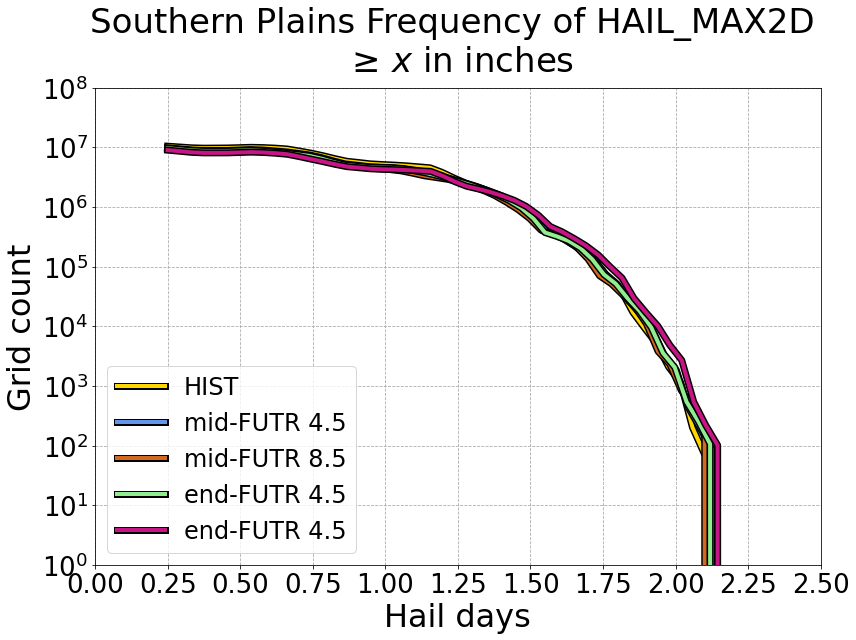

In [30]:
fig, ax = plt.subplots(figsize = (12, 9))

#hist_plt = plt.plot(hist_bins[0:len(hist_bins) -  1], hist_count, color = 'gold', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "HIST")
xnew = np.linspace(hist_nan.min(), hist_nan.max())
spl = scipy.interpolate.make_interp_spline(hist_bins[0:len(hist_bins) -  1], hist_count, k=1) #This is a smoothing function
y_smooth = spl(xnew)
plt.plot(xnew, y_smooth, color = 'gold', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "HIST")

#mid4p5_plt = plt.plot(mid4p5_bins[0:len(mid4p5_bins) -  1], mid4p5_count, color = 'lightsteelblue', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "mid-FUTR 4.5")
xnew1 = np.linspace(mid4p5_nan.min(), mid4p5_nan.max())
spl1 = scipy.interpolate.make_interp_spline(mid4p5_bins[0:len(mid4p5_bins) -  1], mid4p5_count, k=1) #This is a smoothing function
y_smooth1 = spl1(xnew1)
plt.plot(xnew1, y_smooth1, color = 'cornflowerblue', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "mid-FUTR 4.5")

#mid8p5_plt = plt.plot(mid8p5_bins[0:len(mid8p5_bins) -  1], mid8p5_count, color = 'chocolate', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "mid-FUTR 8.5")
xnew2 = np.linspace(mid8p5_nan.min(), mid8p5_nan.max())
spl2 = scipy.interpolate.make_interp_spline(mid8p5_bins[0:len(mid8p5_bins) -  1], mid8p5_count, k=1) #This is a smoothing function
y_smooth2 = spl2(xnew2)
plt.plot(xnew2, y_smooth2, color = 'chocolate', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "mid-FUTR 8.5")

#end4p5_plt = plt.plot(end4p5_bins[0:len(end4p5_bins) -  1], end4p5_count, color = 'lightgreen', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")
xnew3 = np.linspace(end4p5_nan.min(), end4p5_nan.max())
spl3 = scipy.interpolate.make_interp_spline(end4p5_bins[0:len(end4p5_bins) -  1], end4p5_count, k=1) #This is a smoothing function
y_smooth3 = spl3(xnew3)
plt.plot(xnew3, y_smooth3, color = 'lightgreen', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")

#end8p5_plt = plt.plot(end8p5_bins[0:len(end8p5_bins) -  1], end8p5_count, color = 'mediumvioletred', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "end-FUTR 8.5")
xnew4 = np.linspace(end8p5_nan.min(), end8p5_nan.max())
spl4 = scipy.interpolate.make_interp_spline(end8p5_bins[0:len(end8p5_bins) -  1], end8p5_count, k=1) #This is a smoothing function
y_smooth4 = spl4(xnew4)
plt.plot(xnew4, y_smooth4, color = 'mediumvioletred', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")

"""
plt.axvline(x = 27.0875, color = 'k', linestyle = 'dashed', linewidth = 3,  zorder = 15)
plt.axvline(x = 13.575, color = 'crimson', linestyle = '-', linewidth = 2, zorder = 5)
plt.axvline(x = 40.6, color = 'crimson', linestyle = '-', linewidth = 2, zorder = 5)
"""

#mid4p5_plt = plt.plot(mid4p5_nonzero, color = 'teal', label = "mid-FUTR 4.5")
#mid8p5_plt = plt.plot(mid8p5_nonzero, color = 'chocolate', label = "mid-FUTR 8.5")
#end4p5_plt = plt.plot(end4p5_nonzero, color = 'seagreen', label = "end-FUTR 4.5")
#end8p5_plt = plt.plot(end8p5_nonzero, color = 'goldenrod', label = "end-FUTR 8.5")
ax.set_yscale('log')
ax.set_yticks([(10**0), (10**1), (10**2), (10**3), (10**4), (10**5), (10**6), (10**7), (10**8)])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
plt.grid(color = 'darkgray', linestyle = '--')
ax.set_title('Southern Plains Frequency of HAIL_MAX2D \n ≥ $x$ in inches', fontsize = 34, pad = 16)
ax.set_xlabel('Hail days', fontsize = 32)
ax.set_ylabel('Grid count', fontsize = 32)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.legend(fontsize=24, loc='lower left')
plt.tight_layout()
#plt.savefig('/home/scratch/jgoodin/grid_count_figures/annual_hail_dist_midwest.png')
plt.show()